<a href="https://colab.research.google.com/github/Sakhakhini/1/blob/main/In_class_exercise_04_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/29/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
!pip install -q gensim
!pip install -q pyLDAvis
!pip install -q lda2vec
!pip install -q bertopic

%tensorflow_version 1.x

     |████████████████████████████████| 1.7 MB 7.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 57 kB 2.7 MB/s 
     |████████████████████████████████| 5.2 MB 11.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 88 kB 6.1 MB/s 
     |████████████████████████████████| 4.0 MB 32.0 MB/s 
     |████████████████████████████████| 1.2 MB 33.0 MB/s 
     |████████████████████████████████| 77 kB 5.9 MB/s 
     |████████████████████████████████| 895 kB 43.1 MB/s 
     |████████████████████████████████| 636 kB 47.0 MB/s 
     |████████████████████████████████| 6.6 MB 33.2 MB/s 
     |████████████████████████████████| 1.1 MB 45.8 MB/s 
TensorFlow 1.x sel

In [2]:
import re
import warnings
from pprint import pprint
from typing import Any, List, Tuple, Union

import gensim
import matplotlib.pyplot as plt
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim_models
import spacy
import nltk
from nltk.corpus import stopwords

warnings.filterwarnings('ignore', category=DeprecationWarning)

# Prepare matplotlib
plt.style.use('ggplot')

# Prepare spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
# Prepare a list of stopwords for preprocessing step
nltk.download('stopwords')
stop_words = stopwords.words('english')


def word_tokenize(sentences: List[str]):
    return [gensim.utils.simple_preprocess(s, deacc=True) for s in sentences]


def to_bigrams(sentences: List[str],
               bigram_model: gensim.models.phrases.Phraser):
    return [bigram_model[s] for s in sentences]


def to_trigrams(sentences: List[str],
                bigram_model: gensim.models.phrases.Phraser,
                trigram_model: gensim.models.phrases.Phraser):
    return [trigram_model[bigram_model[s]] for s in sentences]


def lemmatize(sentences: List[str],
              pos_tags: List[str] = ['NOUN', 'ADJ', 'VERB', 'ADV']):
    lemmatized = []
    for sentence in sentences:
        doc = nlp(' '.join(sentence))
        lemmatized.append(
            [token.lemma_ for token in doc if token.pos_ in pos_tags])

    return lemmatized


def compute_coherence_scores(model_class: Union[gensim.models.LdaModel,
                                                gensim.models.LsiModel],
                             id2word: gensim.corpora.Dictionary,
                             corpus: List[Tuple[int, int]],
                             texts: List[List[str]],
                             start: int = 5,
                             stop: int = 50,
                             step: int = 5,
                             **kwargs: Any):
    coherence_scores = []
    models = {}

    for num_topics in range(start, stop, step):
        model = model_class(corpus=corpus,
                            num_topics=num_topics,
                            id2word=id2word,
                            **kwargs)
        coherence_model = gensim.models.CoherenceModel(model=model,
                                                       texts=texts,
                                                       dictionary=id2word)

        models[num_topics] = model
        coherence_scores.append(coherence_model.get_coherence())

    return coherence_scores, models


def plot_topics_vs_scores(num_topics: List[int], scores: List[int]) -> None:
    plt.figure(figsize=(10, 10))
    plt.plot(num_topics, coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Coherence Scores')
    plt.show()

    # Print the coherence scores
    for t, s in zip(num_topics, coherence_scores):
        print(f'Num Topics: {t} Coherence Score: {s}')


def visualize_topics(model: Union[gensim.models.LdaModel,
                                  gensim.models.LsiModel],
                     id2word: gensim.corpora.Dictionary,
                     corpus: List[Tuple[int, int]]):
    # Visualize the topics
    pyLDAvis.enable_notebook()
    topics_vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word)
    return topics_vis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/nltk/decorators.py:70: DeprecationWarning: `formatargspec` is deprecated since Python 3.5. Use `signature` and the `Signature` object directly
  formatvalue=lambda value: "")[1:-1]
/usr/local/lib/python3.7/dist-packages/scipy/io/matlab/mio5.py:98: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from .mio5_utils import VarReader5


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
 # Load the dataset
df = pd.read_csv('./cleaned-reviews.csv')

# Remove stopwords from the text
df['review'] = df['review'].apply(
    lambda x: ' '.join([w for w in x.split() if w not in stop_words]))

# Tokenize the sentences
data_words = word_tokenize(df['review'])

# Build bigram & trigram models
bigram_phrases = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words],
                                        threshold=100)

bigram_model = gensim.models.phrases.Phraser(bigram_phrases)
trigram_model = gensim.models.phrases.Phraser(trigram_phrases)

# Transform sentences into bigrams
data_bigrams = to_bigrams(data_words, bigram_model)

# Lemmatize the tokens and keep only nouns, adj, verb, and adv
data_lemmatized = lemmatize(data_bigrams)

# Create corpus
id2word = gensim.corpora.Dictionary(data_lemmatized)
corpus = [id2word.doc2bow(x) for x in data_lemmatized]

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


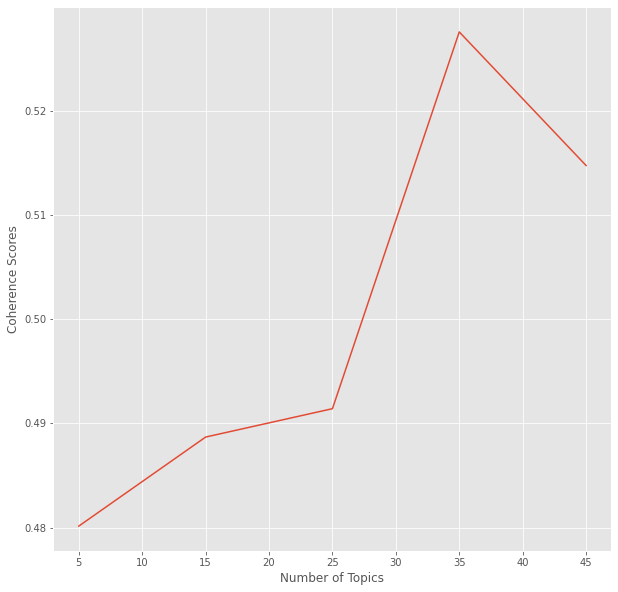

Num Topics: 5 Coherence Score: 0.4801490219543231
Num Topics: 15 Coherence Score: 0.4886902307365405
Num Topics: 25 Coherence Score: 0.4914133865395451
Num Topics: 35 Coherence Score: 0.5275585189349684
Num Topics: 45 Coherence Score: 0.5147395762983819


In [4]:
# Get the best model by looking at the coherence scores
start, stop, step = 5, 50, 10
coherence_scores, lda_models = compute_coherence_scores(gensim.models.LdaModel,
                                                        id2word,
                                                        corpus,
                                                        data_lemmatized,
                                                        start=start,
                                                        stop=stop,
                                                        step=step,
                                                        random_state=100,
                                                        update_every=1,
                                                        chunksize=100,
                                                        passes=10,
                                                        alpha='auto',
                                                        per_word_topics=True)

# Plot graph of coherence scores vs number of topics
num_topics = range(start, stop, step)
plot_topics_vs_scores(num_topics, coherence_scores)

In [5]:
optimal_model = lda_models[35]
def generate_ldavis_data(data_path, model, idx_to_word, freqs, vocab_size):
    """This method will launch a locally hosted session of
    pyLDAvis that will visualize the results of our model
    
    Parameters
    ----------
    data_path : str
        Location where your data is stored.
    model : Lda2Vec
        Loaded lda2vec tensorflow model. 
    idx_to_word : dict
        index to word mapping dictionary
    freqs list: 
        Frequencies of each token.
    vocab_size : int
        Total size of your vocabulary
    """

    doc_embed = model.sesh.run(model.mixture.doc_embedding)
    topic_embed = model.sesh.run(model.mixture.topic_embedding)
    word_embed = model.sesh.run(model.w_embed.embedding)

    # Extract all unique words in order of index 0-vocab_size
    vocabulary = []
    for k,v in idx_to_word.items():
        vocabulary.append(v)

    # Read in document lengths
    doc_lengths = np.load(data_path + "/doc_lengths.npy")

    # The prepare_topics function is a direct copy from Chris Moody
    vis_data = prepare_topics(doc_embed, topic_embed, word_embed, np.array(vocabulary), doc_lengths=doc_lengths,
                              term_frequency=freqs, normalize=True)

    prepared_vis_data = pyLDAvis.prepare(**vis_data)
    pyLDAvis.show(prepared_vis_data)
pprint(optimal_model.print_topics())

[(23,
  '0.063*"parent" + 0.037*"enter" + 0.034*"previously" + 0.032*"asianamerican" '
  '+ 0.020*"situation" + 0.015*"clue" + 0.014*"bright" + 0.011*"flawless" + '
  '0.010*"biopic" + 0.008*"spiritual"'),
 (12,
  '0.050*"mystery" + 0.035*"tree" + 0.032*"blow" + 0.031*"proportion" + '
  '0.015*"useless" + 0.014*"knock" + 0.013*"ultimate" + 0.012*"breath" + '
  '0.011*"protect" + 0.011*"failure"'),
 (32,
  '0.035*"signature" + 0.035*"fate" + 0.031*"thankful" + 0.031*"comprehend" + '
  '0.031*"evoke" + 0.020*"boy" + 0.014*"covid" + 0.011*"raw" + 0.010*"damage" '
  '+ 0.010*"twice"'),
 (9,
  '0.031*"attractive" + 0.027*"account" + 0.027*"facial" + 0.015*"bother" + '
  '0.015*"eastern" + 0.015*"everywhere" + 0.015*"cute" + 0.012*"overrate" + '
  '0.012*"stereotypical" + 0.011*"stray"'),
 (3,
  '0.057*"monster" + 0.045*"thank" + 0.034*"astonish" + 0.033*"upset" + '
  '0.014*"accompany" + 0.014*"poster" + 0.011*"repeat" + 0.010*"indian" + '
  '0.010*"voice" + 0.010*"groundbreake"'),
 (28,
  

In [6]:
visualize_topics(optimal_model, id2word, corpus)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.416864 -0.085950       1        1  28.067577
16    -0.374338 -0.053444       2        1  17.595981
15    -0.335128  0.150789       3        1  14.770698
7     -0.368622 -0.166105       4        1  11.520296
19    -0.032233  0.135869       5        1   3.318858
21    -0.061531  0.277750       6        1   2.812002
6     -0.033352  0.133701       7        1   2.136998
8     -0.016816  0.046830       8        1   1.753959
14    -0.004175  0.077871       9        1   1.480011
33     0.010138  0.029321      10        1   1.283188
10     0.021352 -0.014997      11        1   1.243493
34     0.025476  0.002769      12        1   0.983406
24    -0.005522  0.001720      13        1   0.865844
27     0.045738 -0.019919      14        1   0.793640
26     0.060814 -0.024578      15        1   0.718595
22     0.073204 -0.022208      16        1   0.711321
25     0.051075 -0.016442      17        1   0.684138
31     0.062363 -0.024215      18        1   0.663633
5      0.066303 -0.030133      19        1   0.647213
20     0.067138 -0.018300      20        1   0.643947
30     0.075226 -0.020610      21        1   0.632495
0      0.070310 -0.025729      22        1   0.561935
13     0.069075 -0.023469      23        1   0.550134
4      0.084062 -0.029447      24        1   0.539030
12     0.088195 -0.029186      25        1   0.536792
9      0.076291 -0.028218      26        1   0.527774
29     0.071491 -0.031402      27        1   0.507525
17     0.073281 -0.014593      28        1   0.486030
32     0.087784 -0.029108      29        1   0.482365
3      0.078456 -0.028401      30        1   0.479020
18     0.084123 -0.028618      31        1   0.477534
11     0.054399 -0.016807      32        1   0.419632
1      0.079434 -0.020613      33        1   0.416594
28     0.079685 -0.026856      34        1   0.376215
23     0.093169 -0.027272      35        1   0.312126, topic_info=                     Term         Freq        Total Category  logprob  loglift
20                  movie  4174.000000  4174.000000  Default  30.0000  30.0000
62                   good  1439.000000  1439.000000  Default  29.0000  29.0000
7                    film  1466.000000  1466.000000  Default  28.0000  28.0000
10                  great   897.000000   897.000000  Default  27.0000  27.0000
221                really   878.000000   878.000000  Default  26.0000  26.0000
...                   ...          ...          ...      ...      ...      ...
8159            viability     1.320944     2.254474  Topic35  -5.4125   5.2349
8160       charactersgood     1.320944     2.254474  Topic35  -5.4125   5.2349
8161            humourthe     1.320944     2.254474  Topic35  -5.4125   5.2349
8162                 mild     1.320944     2.254474  Topic35  -5.4125   5.2349
8163  pleasantly_surprise     1.320944     2.254474  Topic35  -5.4125   5.2349

[1229 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
249       9  0.953410      ability
164       3  0.983343         able
2376     14  0.940634  abomination
1150      2  0.925620   absolutely
1150     34  0.065184   absolutely
...     ...       ...          ...
8477     33  0.901145          yea
8377     26  0.590225     yesgreat
5546     17  0.756852    yesterday
512       9  0.739627        young
512      23  0.233566        young

[1381 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 17, 16, 8, 20, 22, 7, 9, 15, 34, 11, 35, 25, 28, 27, 23, 26, 32, 6, 21, 31, 1, 14, 5, 13, 10, 30, 18, 33, 4, 19, 12, 2, 29, 24])

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

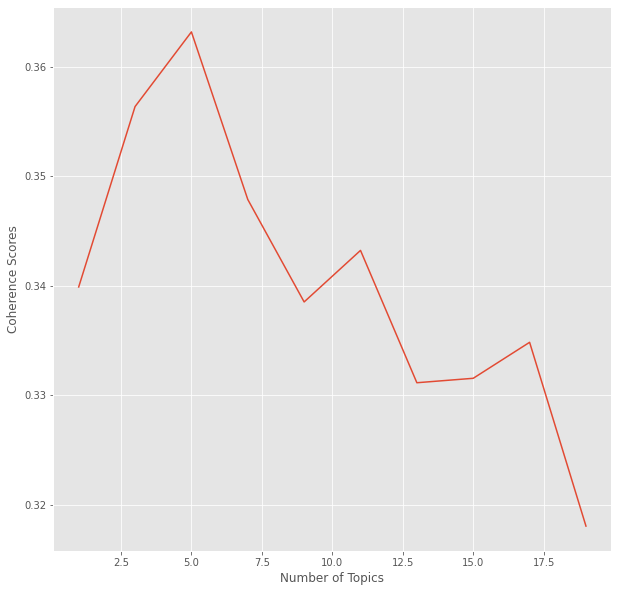

Num Topics: 1 Coherence Score: 0.33989582356921133
Num Topics: 3 Coherence Score: 0.35638416446917515
Num Topics: 5 Coherence Score: 0.3632099854384318
Num Topics: 7 Coherence Score: 0.3478933189381316
Num Topics: 9 Coherence Score: 0.3385278662500677
Num Topics: 11 Coherence Score: 0.3432388361490168
Num Topics: 13 Coherence Score: 0.33114250639693615
Num Topics: 15 Coherence Score: 0.3315489175606229
Num Topics: 17 Coherence Score: 0.33483810148226056
Num Topics: 19 Coherence Score: 0.31803932096496834


In [7]:
# Get the best model by looking at the coherence scores
start, stop, step = 1, 20, 2
coherence_scores, lsi_models = compute_coherence_scores(gensim.models.LsiModel,
                                                        id2word,
                                                        corpus,
                                                        data_lemmatized,
                                                        start=start,
                                                        stop=stop,
                                                        step=step)

# Plot graph of coherence scores vs number of topics
num_topics = range(start, stop, step)
plot_topics_vs_scores(num_topics, coherence_scores)

In [8]:
optimal_model = lsi_models[5]
pprint(optimal_model.print_topics())

[(0,
  '0.530*"movie" + 0.293*"film" + 0.242*"character" + 0.215*"good" + '
  '0.168*"scene" + 0.151*"fight" + 0.151*"make" + 0.144*"story" + '
  '0.136*"marvel" + 0.135*"feel"'),
 (1,
  '-0.675*"movie" + 0.651*"film" + 0.117*"character" + 0.111*"also" + '
  '0.085*"well" + 0.067*"great" + 0.050*"new" + 0.048*"use" + 0.048*"action" + '
  '0.047*"ring"'),
 (2,
  '0.524*"film" + 0.332*"movie" + -0.243*"fight" + -0.153*"go" + '
  '0.134*"action" + -0.127*"would" + -0.120*"get" + -0.114*"kill" + '
  '-0.113*"know" + -0.113*"make"'),
 (3,
  '-0.723*"good" + -0.322*"scene" + -0.202*"great" + -0.202*"fight" + '
  '0.201*"movie" + 0.150*"film" + 0.124*"character" + -0.113*"action" + '
  '0.103*"would" + -0.100*"also"'),
 (4,
  '0.533*"character" + -0.287*"film" + 0.257*"really" + -0.237*"fight" + '
  '0.235*"well" + 0.205*"story" + 0.159*"great" + -0.147*"watch" + '
  '-0.131*"would" + 0.121*"also"')]


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [9]:
!wget --no-check-certificate "http://nlp.stanford.edu/data/glove.6B.zip"

--2022-04-24 06:53:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2022-04-24 06:53:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2022-04-24 06:53:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [10]:
!unzip glove.6B.zip

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [11]:
from lda2vec.nlppipe import Preprocessor

# Data directory
data_dir ="data"
# Where to save preprocessed data
clean_data_dir = "data/clean_data"

# Should we load pretrained embeddings from file
load_embeds = True

# Initialize a preprocessor
P = Preprocessor(df, "review", max_features=30000, maxlen=10000, min_count=30)

# Run the preprocessing on your dataframe
P.preprocess()

# Load embeddings from file if we choose to do so
if load_embeds:
    # Load embedding matrix from file path - change path to where you saved them
    embedding_matrix = P.load_glove("glove.6B.300d.txt")
else:
    embedding_matrix = None

# Save data to data_dir
P.save_data(clean_data_dir, embedding_matrix=embedding_matrix)

Using TensorFlow backend.



---------- Tokenizing Texts ----------


2023it [00:02, 714.57it/s] 


Removing 12103 low frequency tokens out of 12852 total tokens

---------- Getting Skipgrams ----------


2023it [00:03, 603.94it/s]
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
from lda2vec import utils, model

# Path to preprocessed data
data_path  = "data/clean_data"
# Whether or not to load saved embeddings file
load_embeds = True

# Load data from files
(idx_to_word, word_to_idx, freqs, pivot_ids,
 target_ids, doc_ids, embed_matrix) = utils.load_preprocessed_data(data_path, load_embed_matrix=load_embeds)

# Number of unique documents
num_docs = doc_ids.max() + 1
# Number of unique words in vocabulary (int)
vocab_size = len(freqs)
# Embed layer dimension size
# If not loading embeds, change 128 to whatever size you want.
embed_size = embed_matrix.shape[1] if load_embeds else 128
# Number of topics to cluster into
num_topics = 15
# Amount of iterations over entire dataset
num_epochs = 15
# Batch size - Increase/decrease depending on memory usage
batch_size = 512
# Epoch that we want to "switch on" LDA loss
switch_loss_epoch = 5
# Pretrained embeddings value
pretrained_embeddings = embed_matrix if load_embeds else None
# If True, save logdir, otherwise don't
save_graph = True


# Initialize the model
m = model(num_docs,
          vocab_size,
          num_topics,
          embedding_size=embed_size,
          pretrained_embeddings=pretrained_embeddings,
          freqs=freqs,
          batch_size = batch_size,
          save_graph_def=save_graph)

try:
    # Train the model
    m.train(pivot_ids,
            target_ids,
            doc_ids,
            len(pivot_ids),
            num_epochs,
            idx_to_word=idx_to_word,
            switch_loss_epoch=switch_loss_epoch)
except:
    print('Error Ignored')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.










EPOCH: 1
LOSS 4.7134495 w2v 4.7134495 lda 10744.859

EPOCH: 2
LOSS 4.4352765 w2v 4.4352765 lda 10744.696

EPOCH: 3
LOSS 4.5857215 w2v 4.5857215 lda 10883.135

EPOCH: 4
LOSS 4.2430882 w2v 4.2430882 lda 11083.64

EPOCH: 5
LOSS nan w2v nan lda 11240.058
Instructions for updating:
keep_dims is deprecated, use keepdims instead
---------Closest 10 words to given indexes----------
Topic 0 : definitely, recommend, addition, cinematic, unfortunately, seeing, probably, expect, worth, certainly
Topic 1 : mcu, introduced, addition, 

In [13]:
import numpy as np
from lda2vec.utils import prepare_topics

def generate_ldavis_data(data_path, model, idx_to_word, freqs, vocab_size):
    doc_embed = model.sesh.run(model.mixture.doc_embedding)
    topic_embed = model.sesh.run(model.mixture.topic_embedding)
    word_embed = model.sesh.run(model.w_embed.embedding)

    # Extract all unique words in order of index 0-vocab_size
    vocabulary = []
    for k,v in idx_to_word.items():
        vocabulary.append(v)

    # Read in document lengths
    doc_lengths = np.load(data_path + "/doc_lengths.npy")

    # The prepare_topics function is a direct copy from Chris Moody
    vis_data = prepare_topics(doc_embed, topic_embed, word_embed, np.array(vocabulary), doc_lengths=doc_lengths,
                              term_frequency=freqs, normalize=True)

    # Visualize the topics
    pyLDAvis.enable_notebook()
    topics_vis = pyLDAvis.prepare(**vis_data)
    return topics_vis

In [14]:
generate_ldavis_data(data_path, m, idx_to_word, freqs, vocab_size)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
10    -0.061420  0.008716       1        1  6.669532
11    -0.008833  0.021803       2        1  6.668565
14    -0.020394 -0.007373       3        1  6.668420
2     -0.008024  0.036841       4        1  6.667722
7     -0.003599  0.021847       5        1  6.667717
8     -0.001191 -0.014604       6        1  6.666657
5     -0.003793 -0.010668       7        1  6.666432
12    -0.022052 -0.029809       8        1  6.666395
9      0.021954 -0.008586       9        1  6.666173
6      0.033004  0.023315      10        1  6.666097
1      0.002517 -0.001833      11        1  6.665657
0      0.016054 -0.009773      12        1  6.665363
13    -0.003026 -0.005335      13        1  6.665333
4      0.045217  0.004248      14        1  6.664982
3      0.013586 -0.028788      15        1  6.664953, topic_info=          Term        Freq       Total Category  logprob  loglift
415         ll  395.000000  395.000000  Default  30.0000  30.0000
303     course  327.000000  327.000000  Default  29.0000  29.0000
430    forward  155.000000  155.000000  Default  28.0000  28.0000
153        top  253.000000  253.000000  Default  27.0000  27.0000
652   training  199.000000  199.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
522     coming   17.358488  205.387206  Topic15  -5.8896   0.2375
604     finish   17.386589  208.849694  Topic15  -5.8880   0.2224
521  spiderman   16.480145  220.111326  Topic15  -5.9415   0.1163
2         film   16.269277  193.750731  Topic15  -5.9544   0.2310
546       kill   16.216677  226.680843  Topic15  -5.9576   0.0708

[760 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
453       1  0.205562   able
453       2  0.079062   able
453       3  0.079062   able
453       4  0.063250   able
453       5  0.086969   able
...     ...       ...    ...
732      11  0.064912  young
732      12  0.026728  young
732      13  0.068730  young
732      14  0.042002  young
732      15  0.053457  young

[5745 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 12, 15, 3, 8, 9, 6, 13, 10, 7, 2, 1, 14, 5, 4])

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [15]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df['review'])


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/64 [00:00<?, ?it/s]

2022-04-24 07:01:20,951 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-04-24 07:01:39,084 - BERTopic - Reduced dimensionality with UMAP
2022-04-24 07:01:39,294 - BERTopic - Clustered UMAP embeddings with HDBSCAN


In [16]:
freq = topic_model.get_topic_info()
freq.head(5)

,Topic,Count,Name
0,-1,1006,-1_movie_marvel_film_good
1,0,143,0_movie_scene_good_great
2,1,125,1_shang_chi_movie_marvel
3,2,118,2_shangchi_film_ring_character
4,3,92,3_leung_tony_chinese_movie


In [17]:
# Visualize topics 
topic_model.visualize_topics()

In [18]:
# Visualize topic distribution 
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [19]:
# Visualize topic hierarchy
topic_model.visualize_hierarchy(top_n_topics=50)

In [20]:
# Visualize terms
topic_model.visualize_barchart(top_n_topics=5)

In [21]:
# Visualize topic similarity
topic_model.visualize_heatmap(n_clusters=15, width=1000, height=1000)

In [22]:
# Visualize term score decline
topic_model.visualize_term_rank()

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [23]:
'''
The four algorithms perform relatively well on the data. However, there are some
subtle differences in the performance. LDA, finds a large number of topics (35)
which most contain redundancies, LSA on the other hand finds only a handlful of 
topics (5). The topics contain mostly similar words. lda2vec on performs relatively
well separating the topics well. However, like LDA it still has redundacies in its
topics for example, the word adventure appears in most topics. BERTopic works fairly
well but considering its computation complexity it still lags behind other methods
while being the most demanding. Its topic are not as coherent as those of other methods. 

In conclusino LDA is the best algorithm as it light weight and has good results.
'''

'\nThe four algorithms perform relatively well on the data. However, there are some\nsubtle differences in the performance. LDA, finds a large number of topics (35)\nwhich most contain redundancies, LSA on the other hand finds only a handlful of \ntopics (5). The topics contain mostly similar words. lda2vec on performs relatively\nwell separating the topics well. However, like LDA it still has redundacies in its\ntopics for example, the word adventure appears in most topics. BERTopic works fairly\nwell but considering its computation complexity it still lags behind other methods\nwhile being the most demanding. Its topic are not as coherent as those of other methods. \n\nIn conclusino LDA is the best algorithm as it light weight and has good results.\n'